<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Visio-Glance/blob/XAI/cnn1_model(1)_with_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

model_path = '/content/drive/My Drive/cnn1_model_(1).h5'
try:
    model = load_model(model_path)
    print("Model loaded successfully from:", model_path)
except Exception as e:
    print("Error loading model:", e)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded successfully from: /content/drive/My Drive/cnn1_model_(1).h5


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,704,902 (6.50 MB)

 Trainable params: 1,702,916 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)

In [28]:
print(model.layers)
print(model.inputs)
print(model.outputs)

[<Conv2D name=conv2d, built=True>, <BatchNormalization name=batch_normalization, built=True>, <LeakyReLU name=leaky_re_lu, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Dropout name=dropout, built=True>, <Conv2D name=conv2d_1, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <LeakyReLU name=leaky_re_lu_1, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Dropout name=dropout_1, built=True>, <Conv2D name=conv2d_2, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <LeakyReLU name=leaky_re_lu_2, built=True>, <MaxPooling2D name=max_pooling2d_2, built=True>, <Dropout name=dropout_2, built=True>, <Conv2D name=conv2d_3, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <LeakyReLU name=leaky_re_lu_3, built=True>, <MaxPooling2D name=max_pooling2d_3, built=True>, <Dropout name=dropout_3, built=True>, <Conv2D name=conv2d_4, built=True>, <BatchNormalization name=batch_normalization_4, built=True>, 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


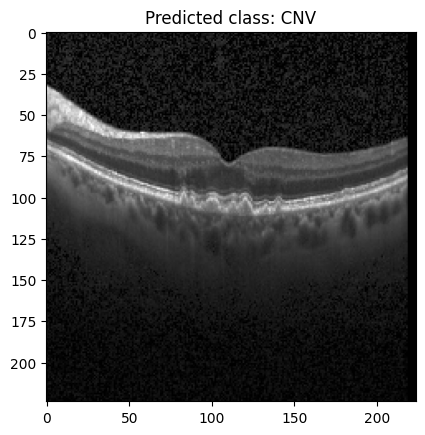

Predicted class: CNV


In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Import PIL module for error handling
import PIL

# Load the model
from tensorflow.keras.models import load_model
model_path = '/content/drive/My Drive/cnn1_model_(1).h5'
model = load_model(model_path)

# Define the image path
image_path = '/content/drive/My Drive/Dinu/DRUSEN-364469-4.jpeg'

# Verify the image file before loading
try:
    # Attempt to open the image file using PIL
    from PIL import Image
    img = Image.open(image_path)
    img.verify()  # Verify image integrity
    img.close()  # Close the image file

    # If verification is successful, proceed with loading the image for prediction
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    # Assuming you have a list of class labels
    class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']  # Replace with your actual class labels if different
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class_label}")
    plt.show()

    print("Predicted class:", predicted_class_label)

except (FileNotFoundError, PIL.UnidentifiedImageError) as e: # Use PIL.UnidentifiedImageError for specific error handling
    print(f"Error: {e}")
    print("Please check the image file path and ensure it's a valid image.")

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

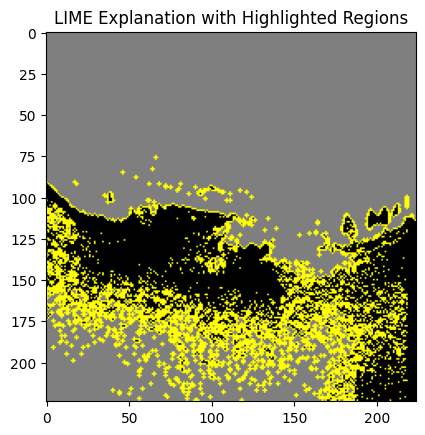

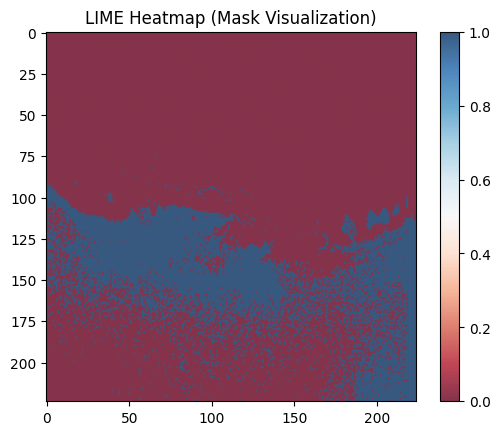

In [32]:
!pip install lime==0.2.0.1

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np


# Create an explainer object
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(img_array[0].astype('double'),
                                         model.predict,
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000)

# Get the explanation for the top predicted class
class_index_to_explain = 0
temp, mask = explanation.get_image_and_mask(explanation.top_labels[class_index_to_explain],
                                           positive_only=True,  # Or False for both positive and negative contributions
                                           num_features=5,
                                           hide_rest=True)  # Or False to show the entire image

# Display the explanation with highlighted regions
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title('LIME Explanation with Highlighted Regions')
plt.show()

# Instead of using explanation.heatmap, visualize the mask as a heatmap:
plt.imshow(mask, cmap='RdBu', alpha=0.8)  # Use 'RdBu' or other colormaps
plt.colorbar()  # Add a colorbar to the heatmap
plt.title('LIME Heatmap (Mask Visualization)')
plt.show()